# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
data = pd.read_csv('MarketPricePrediction.csv')

# Explore Dataset

In [3]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
data.shape

(10227, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


# Preprocessing

In [8]:
data['date'] = pd.to_datetime(data['date'], format='%B-%Y')

In [9]:
data.set_index('date', inplace=True)

In [10]:
data.drop(columns=['month','year'], inplace=True)

In [11]:
categorical_columns = data.select_dtypes(include=object).columns.tolist()

In [12]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [13]:
data.head()

,market,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,
2005-01-01,0,2350,404,493,446,16,0
2006-01-01,0,900,487,638,563,16,0
2010-01-01,0,790,1283,1592,1460,16,0
2011-01-01,0,245,3067,3750,3433,16,0
2012-01-01,0,1035,523,686,605,16,0


In [14]:
data.sort_index(inplace=True)

# Exploratory Data Analysis (EDA)

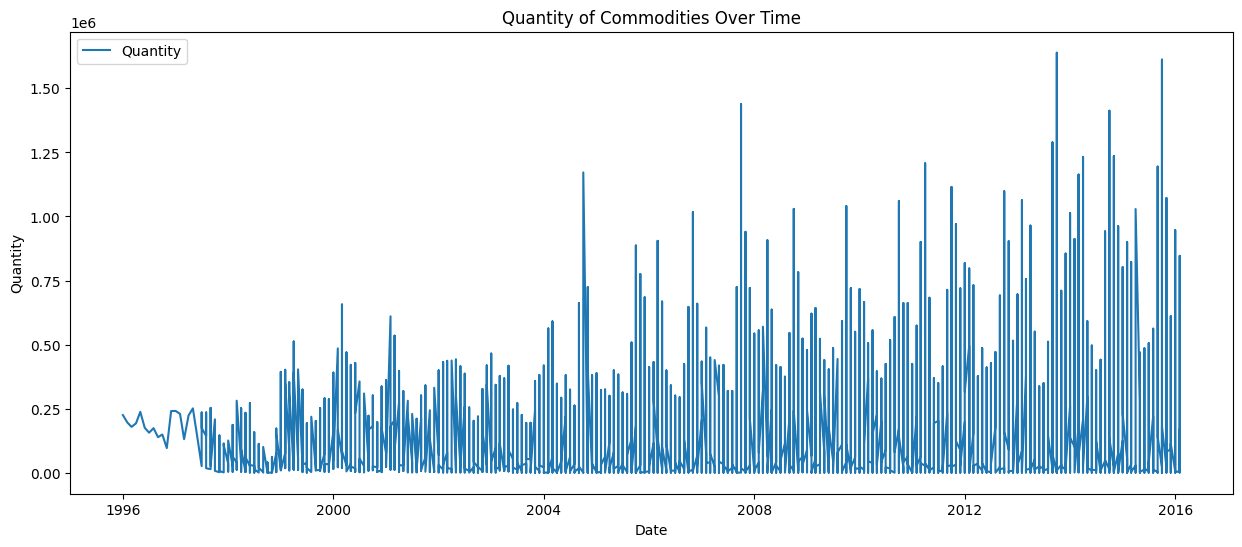

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['quantity'], label='Quantity')
plt.title('Quantity of Commodities Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

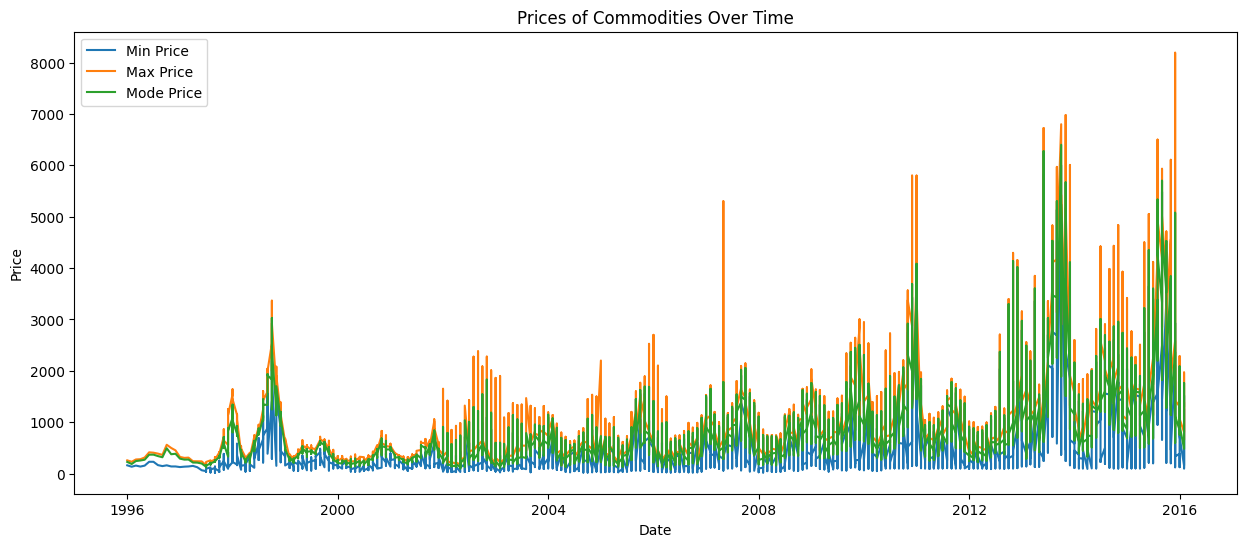

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['priceMin'], label='Min Price')
plt.plot(data.index, data['priceMax'], label='Max Price')
plt.plot(data.index, data['priceMod'], label='Mode Price')
plt.title('Prices of Commodities Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Feature Engineering

In [17]:
data['quantity_lag1'] = data['quantity'].shift(1)
data['priceMin_lag1'] = data['priceMin'].shift(1)
data['priceMax_lag1'] = data['priceMax'].shift(1)
data['priceMod_lag1'] = data['priceMod'].shift(1)

In [18]:
data['quantity_roll_mean'] = data['quantity'].rolling(window=3).mean()
data['priceMin_roll_mean'] = data['priceMin'].rolling(window=3).mean()
data['priceMax_roll_mean'] = data['priceMax'].rolling(window=3).mean()
data['priceMod_roll_mean'] = data['priceMod'].rolling(window=3).mean()

In [19]:
data.isna().sum()

market                0
quantity              0
priceMin              0
priceMax              0
priceMod              0
state                 0
city                  0
quantity_lag1         1
priceMin_lag1         1
priceMax_lag1         1
priceMod_lag1         1
quantity_roll_mean    2
priceMin_roll_mean    2
priceMax_roll_mean    2
priceMod_roll_mean    2
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
data.head()

,market,quantity,priceMin,priceMax,priceMod,state,city,quantity_lag1,priceMin_lag1,priceMax_lag1,priceMod_lag1,quantity_roll_mean,priceMin_roll_mean,priceMax_roll_mean,priceMod_roll_mean
date,,,,,,,,,,,,,,,
1996-03-01,68,178992,155,274,243,14,65,196164.0,133.0,229.0,186.0,200073.000000,149.333333,253.333333,218.333333
1996-04-01,68,192592,136,279,254,14,65,178992.0,155.0,274.0,243.0,189249.333333,141.333333,260.666667,227.666667
1996-05-01,68,237574,154,312,269,14,65,192592.0,136.0,279.0,254.0,203052.666667,148.333333,288.333333,255.333333
1996-06-01,68,175308,229,413,367,14,65,237574.0,154.0,312.0,269.0,201824.666667,173.000000,334.666667,296.666667
1996-07-01,68,156282,229,406,368,14,65,175308.0,229.0,413.0,367.0,189721.333333,204.000000,377.000000,334.666667


# Model Selection and Training

Arima Model

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

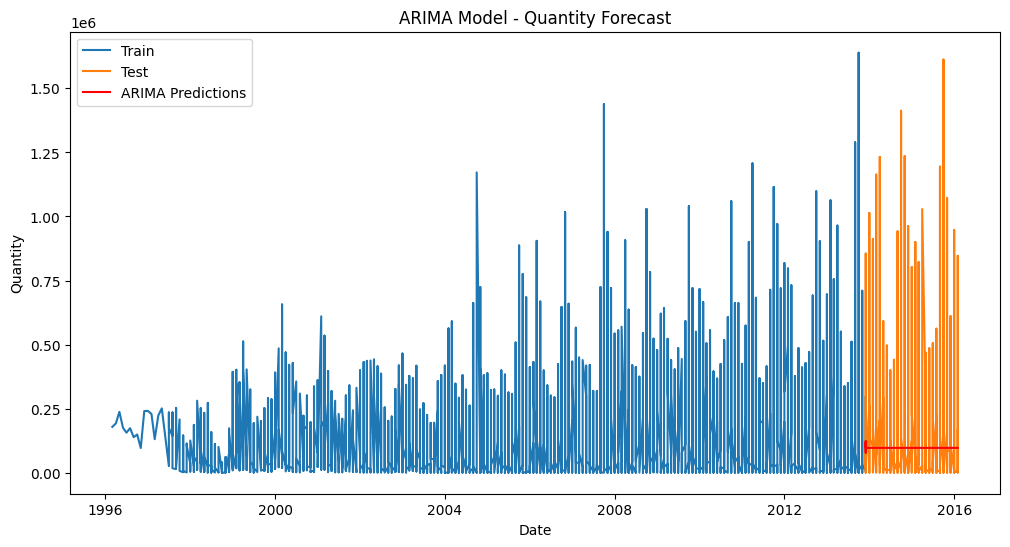

In [22]:
from statsmodels.tsa.arima.model import ARIMA

quantity_series = data['quantity']

# Split data into train and test sets
train_size = int(len(quantity_series) * 0.8)
train, test = quantity_series[0:train_size], quantity_series[train_size:]

# Fit the ARIMA model
model_arima = ARIMA(train, order=(5, 1, 0))
model_arima_fit = model_arima.fit()

# Make predictions
predictions_arima = model_arima_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions_arima, color='red', label='ARIMA Predictions')
plt.title('ARIMA Model - Quantity Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

SARIMA

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

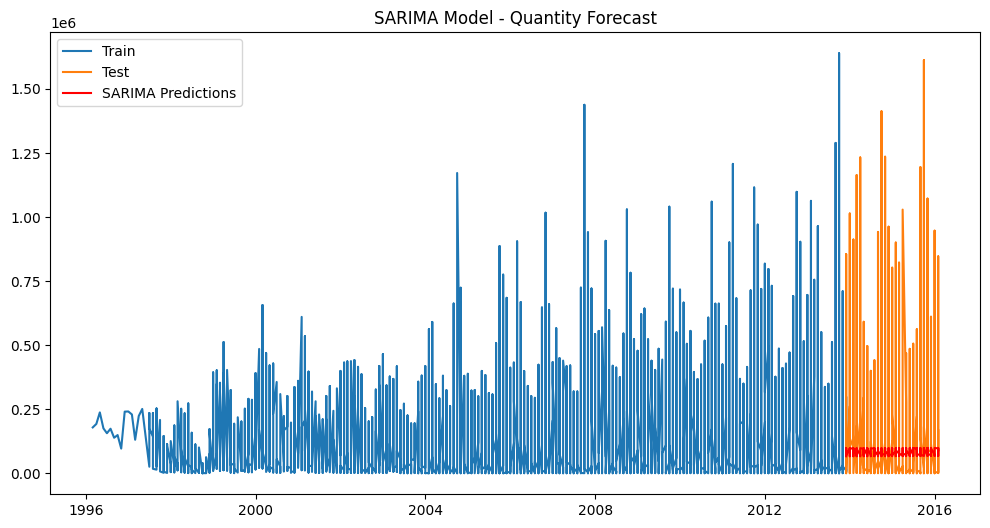

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit(disp=False)

# Make predictions
predictions_sarima = model_sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions_sarima, color='red', label='SARIMA Predictions')
plt.title('SARIMA Model - Quantity Forecast')
plt.legend()
plt.show()

# Model Evaluation

In [24]:
mae_arima = mean_absolute_error(test, predictions_arima)
mse_arima = mean_squared_error(test, predictions_arima)
rmse_arima = np.sqrt(mse_arima)
print(f'MAE: {mae_arima}')
print(f'MSE: {mse_arima}')
print(f'RMSE: {rmse_arima}')

MAE: 94913.55441599422
MSE: 21447506749.25946
RMSE: 146449.67309372686


In [25]:
mae_sarima = mean_absolute_error(test, predictions_sarima)
mse_sarima = mean_squared_error(test, predictions_sarima)
rmse_sarima = np.sqrt(mse_sarima)
print(f'MAE: {mae_sarima}')
print(f'MSE: {mse_sarima}')
print(f'RMSE: {rmse_sarima}')

MAE: 87016.823844053
MSE: 21374371243.813015
RMSE: 146199.76485553256


Sarima Model is better than Arima model because it's errors is less